In [2]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import os
from build import build_model
import coralme
from tqdm import tqdm

In [3]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [4]:
survivors = set(pandas.read_csv("survivors.txt",index_col=0,header=None).index.to_list())
len(survivors)

495

In [4]:
dct = {}
condition = "IBD"
for org in survivors:
    try:
        dct[org] = {
            "targets_IBD" : len(pandas.read_csv("./ibdmdb/reduction_targets/{}/{}_targets.txt".format("IBD",org),header=None,index_col=0).index.to_list()),
            "targets_nonIBD" : len(pandas.read_csv("./ibdmdb/reduction_targets/{}/{}_targets.txt".format("nonIBD",org),header=None,index_col=0).index.to_list()),
            "killable_IBD" : len(pandas.read_csv("./ibdmdb/reduction/{}/{}_killable.txt".format("IBD",org),header=None,index_col=0).index.to_list()),
            "killable_nonIBD" : len(pandas.read_csv("./ibdmdb/reduction/{}/{}_killable.txt".format("nonIBD",org),header=None,index_col=0).index.to_list())
        }
        # break
    except:
        pass
Fraction = pandas.DataFrame.from_dict(dct).T

In [8]:
Fraction["fraction_IBD"] = Fraction["killable_IBD"] / Fraction["targets_IBD"]
Fraction["fraction_nonIBD"] = Fraction["killable_nonIBD"] / Fraction["targets_nonIBD"]

In [9]:
Fraction.to_csv("reducible_fraction.csv")

In [10]:
Fraction = pandas.read_csv("reducible_fraction.csv",index_col=0)

In [14]:
growths = pandas.read_csv("./datasets/3.5.IBDred_growth_rates.csv",index_col=0)

<Axes: ylabel='Frequency'>

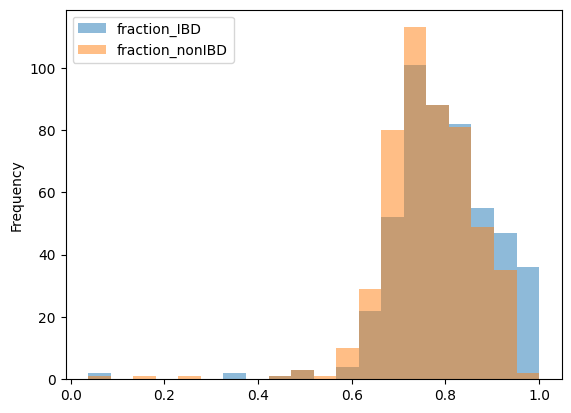

In [11]:
Fraction[["fraction_IBD","fraction_nonIBD"]].plot.hist(alpha=0.5,bins=20)